In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
pathy=pathchow

In [3]:
path=pathy+'/data/tempsweep_sweep_2022-02-11-20-33-23'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_3/data2022-02-11-01-08-46.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_100/data2022-02-11-20-33-22.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_1/data2022-02-10-20-12-19.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_7/data2022-02-11-10-53-31.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_6/data2022-02-11-08-25-49.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_sweep_2022-02-11-20-33-23/tempsweep_sweep_9/data2022-02-11-15-40-25.h5
reading data  /home/jfm343/Documents/D

In [4]:
df

,theta,freq,SE,error,KFX,KFY,T,nu,intP,FS_point,dispname,t1,t2,SFname,J
0,0.000000,0.000,5.525361,0.111027,2.607302,-0.006953,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
1,0.000000,1.034,4.701241,0.000033,2.607302,-0.006953,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
2,0.000000,2.068,4.714344,0.000032,2.607302,-0.006953,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
3,0.000000,3.102,4.781268,0.000222,2.607302,-0.006953,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
4,0.000000,4.136,4.687189,0.000032,2.607302,-0.006953,3.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_0.0,10.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.523599,201.630,5.309841,0.002049,2.421355,1.409822,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
196,0.523599,202.664,5.313297,0.002019,2.421355,1.409822,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
197,0.523599,203.698,5.317218,0.001982,2.421355,1.409822,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34
198,0.523599,204.732,5.321332,0.001954,2.421355,1.409822,5.0,0.5,6000,616,lattice_disp,54.932302,-10.444874,fit_SF_func_theta_30.0,10.34


[  3. 100.   1.   7.   6.   9.  10.   4.   8.   2.   5.]


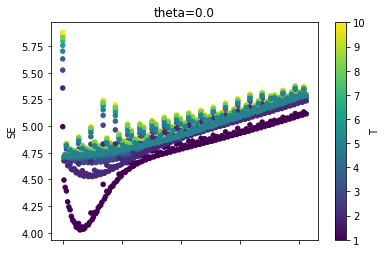

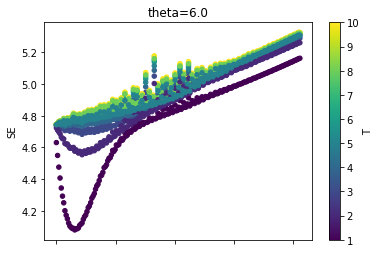

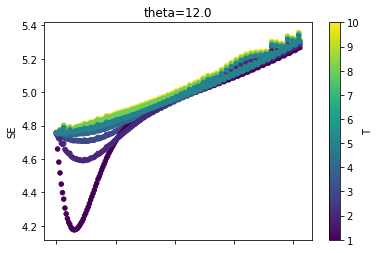

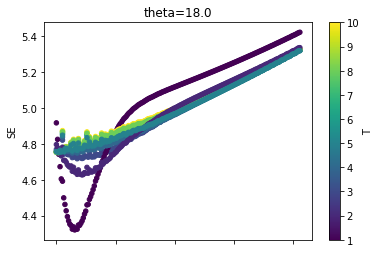

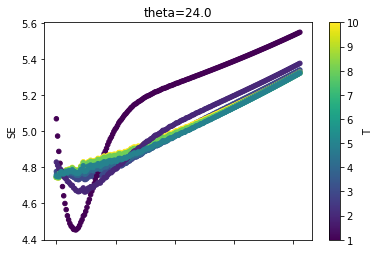

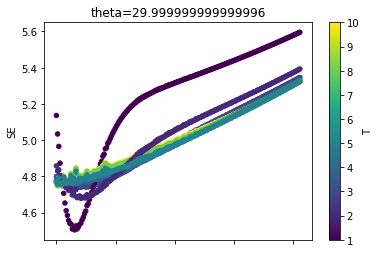

In [5]:
thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
    plt.title('theta='+str(th*180/np.pi))
    
print(tss)

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


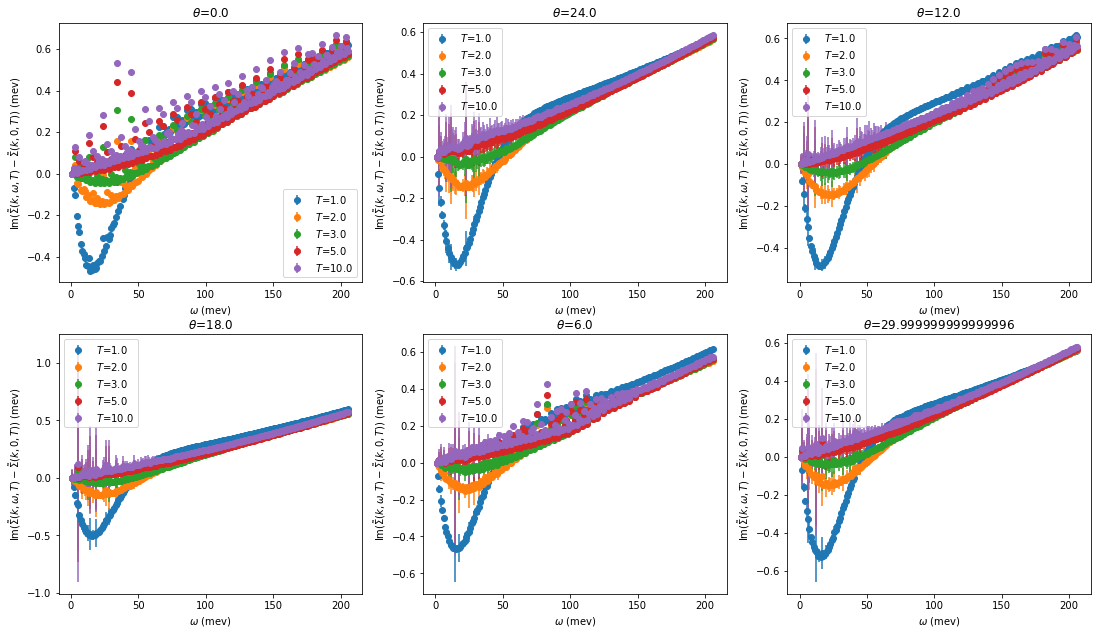

In [6]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,2.0,3.0,5.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
            
        err=df3['error']
        axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[0.41887902047863906]
0 0 0


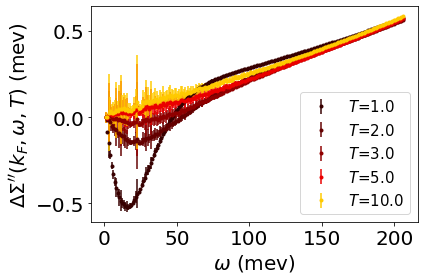

In [19]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,5.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=4)
    plt.tight_layout()
plt.savefig("imgs/fig2c")

[0.41887902047863906]
0 0 0


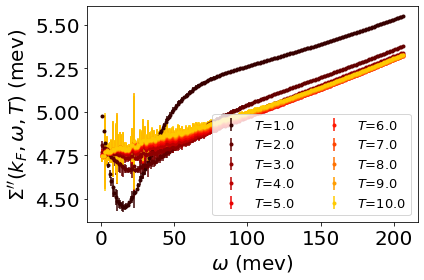

In [20]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[4]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0, 4.0 ,5.0, 6.0 ,7.0,8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 13}, loc=4, ncol=2)
    plt.tight_layout()
plt.savefig("imgs/fig1b")